In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt

/kaggle/input/flood-prediction-factors/flood.csv


In [65]:
df = pd.read_csv("/kaggle/input/flood-prediction-factors/flood.csv")

In [66]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [68]:
df.duplicated().sum()

0

### 0 Null Values
### 0 Duplicated Values

In [69]:
df.corr()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
MonsoonIntensity,1.000000,-0.003470,0.002247,-0.005384,0.005092,0.005959,0.002790,-0.003191,0.002723,-0.003723,...,-0.000118,-0.004600,-0.002315,-0.008859,0.001763,-0.003597,0.005938,0.003455,0.005402,0.224081
TopographyDrainage,-0.003470,1.000000,0.002492,0.002046,0.000116,-0.002288,-0.004472,0.010675,-0.004550,-0.007272,...,-0.001608,-0.000717,-0.002040,0.005312,0.003654,0.005887,0.003515,0.005276,0.008191,0.229414
RiverManagement,0.002247,0.002492,1.000000,0.004808,-0.009651,0.007199,0.007697,-0.000389,0.003635,0.009253,...,0.002171,-0.000111,-0.004339,0.000097,0.000604,-0.001382,0.002012,0.000364,-0.006323,0.228917
Deforestation,-0.005384,0.002046,0.004808,1.000000,-0.011325,0.000517,-0.000728,-0.000823,0.002929,-0.003507,...,-0.001060,-0.003019,0.005258,0.002171,-0.002093,0.000138,-0.000718,-0.001108,0.001242,0.220237
Urbanization,0.005092,0.000116,-0.009651,-0.011325,1.000000,0.007478,0.000268,-0.001287,-0.001391,-0.011386,...,-0.005281,-0.000881,-0.000651,-0.003479,0.004222,0.002154,0.013263,-0.000864,-0.002418,0.220867
ClimateChange,0.005959,-0.002288,0.007199,0.000517,0.007478,1.000000,-0.002889,0.001514,-0.003362,0.000075,...,-0.007587,-0.001467,0.000689,0.003023,0.003281,-0.008334,-0.000547,-0.000186,-0.004453,0.220986
DamsQuality,0.002790,-0.004472,0.007697,-0.000728,0.000268,-0.002889,1.000000,0.003239,0.001743,0.001638,...,0.004165,-0.009503,0.000436,0.005322,-0.004001,0.006856,-0.000662,0.001535,0.001699,0.227467
Siltation,-0.003191,0.010675,-0.000389,-0.000823,-0.001287,0.001514,0.003239,1.000000,-0.003911,0.000158,...,-0.008296,-0.003564,-0.001866,0.003682,0.003045,-0.002484,0.007903,0.011918,-0.001597,0.226544
AgriculturalPractices,0.002723,-0.004550,0.003635,0.002929,-0.001391,-0.003362,0.001743,-0.003911,1.000000,-0.006564,...,0.000648,-0.003708,0.004142,0.004371,0.003248,0.001678,-0.007963,-0.002221,-0.001280,0.221846
Encroachments,-0.003723,-0.007272,0.009253,-0.003507,-0.011386,0.000075,0.001638,0.000158,-0.006564,1.000000,...,-0.005960,-0.006591,-0.003032,0.003679,0.002774,0.003874,0.005706,0.001380,-0.007547,0.218259


In [70]:
 df.corr()['FloodProbability']

MonsoonIntensity                   0.224081
TopographyDrainage                 0.229414
RiverManagement                    0.228917
Deforestation                      0.220237
Urbanization                       0.220867
ClimateChange                      0.220986
DamsQuality                        0.227467
Siltation                          0.226544
AgriculturalPractices              0.221846
Encroachments                      0.218259
IneffectiveDisasterPreparedness    0.225126
DrainageSystems                    0.217895
CoastalVulnerability               0.215187
Landslides                         0.222991
Watersheds                         0.228152
DeterioratingInfrastructure        0.229444
PopulationScore                    0.226928
WetlandLoss                        0.223732
InadequatePlanning                 0.223329
PoliticalFactors                   0.225009
FloodProbability                   1.000000
Name: FloodProbability, dtype: float64

#### Correlation between Target and other features is similar.
#### Thus, every column is important.

### **Converting target feature (which is probability based, eg - 0.3, 0.2,0.7) to discrete values (binary => 0,1)**

In [71]:
df['FloodProbability'] = (df['FloodProbability'] >= 0.5).astype(int)

In [72]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,1
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,1
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0


In [73]:
class_counts = df['FloodProbability'].value_counts()

class_percentages = (class_counts / len(df)) * 100

print(f"Class counts: {class_counts}")
print()
print(f"Class percentages: {class_percentages}")

Class counts: FloodProbability
1    25513
0    24487
Name: count, dtype: int64

Class percentages: FloodProbability
1    51.026
0    48.974
Name: count, dtype: float64


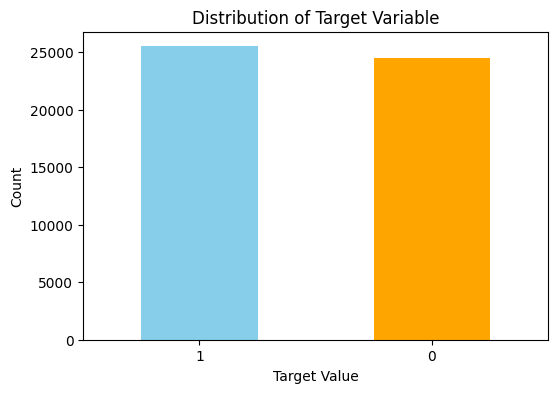

In [74]:
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
df['FloodProbability'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### **We have a balanced dataset**

## **ANN**

#### Train-Test Split (70% Train - 30% Test)

In [75]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [77]:
X_train.head(3)

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
38094,5,6,1,8,3,8,5,6,3,3,3,4,7,3,5,5,9,1,3,11
40624,2,3,6,8,6,4,3,9,9,5,6,5,9,4,3,5,6,3,6,2
49425,9,7,5,3,9,7,9,4,7,4,8,4,4,3,3,5,8,7,5,4


In [78]:
y_train.head(3)

38094    0
40624    1
49425    1
Name: FloodProbability, dtype: int64

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [80]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

#### **Building ANN**

In [81]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [82]:
num_features = len(X_train.columns)
print(f"Number of input features: {num_features}")

Number of input features: 20


In [83]:
model = Sequential()

model.add(Dense(36,activation='relu',input_dim=20))
model.add(Dropout(0.2))

model.add(Dense(24,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(5,activation='relu'))

model.add(Dense(3,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 36)                756       
                                                                 
 dropout_3 (Dropout)         (None, 36)                0         
                                                                 
 dense_8 (Dense)             (None, 24)                888       
                                                                 
 dropout_4 (Dropout)         (None, 24)                0         
                                                                 
 dense_9 (Dense)             (None, 16)                400       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 10)               

In [85]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [86]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [87]:
history = model.fit(X_train_s,y_train,epochs=100,validation_split=0.2, callbacks=callback)

Epoch 1/100
875/875 [==============================] - 6s 4ms/step - loss: 0.2783 - accuracy: 0.8725 - val_loss: 0.0611 - val_accuracy: 0.9796
Epoch 2/100
875/875 [==============================] - 3s 4ms/step - loss: 0.0890 - accuracy: 0.9652 - val_loss: 0.0287 - val_accuracy: 0.9911
Epoch 3/100
875/875 [==============================] - 4s 4ms/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.0152 - val_accuracy: 0.9976
Epoch 4/100
875/875 [==============================] - 3s 4ms/step - loss: 0.0261 - accuracy: 0.9900 - val_loss: 0.0103 - val_accuracy: 0.9959
Epoch 5/100
875/875 [==============================] - 3s 4ms/step - loss: 0.0132 - accuracy: 0.9951 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/100
875/875 [==============================] - 4s 4ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0019 - val_accuracy: 0.9991
Epoch 7/100
875/875 [==============================] - 4s 4ms/step - loss: 0.0066 - accuracy: 0.9975 - val_loss: 4.0277e-04 - val_accuracy: 1.

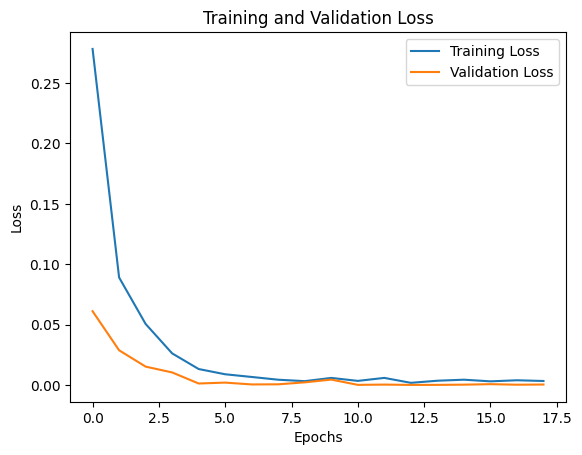

In [88]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend() 

plt.show()  

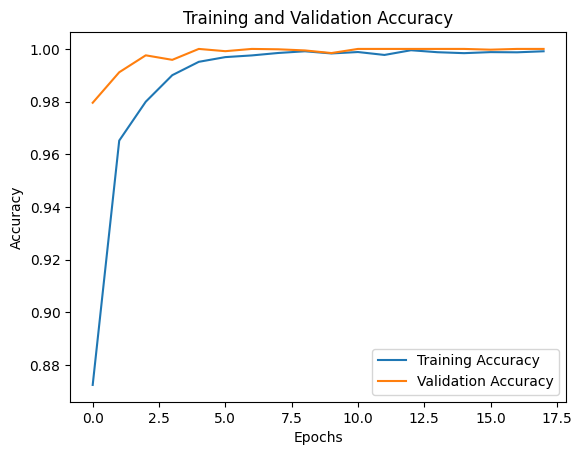

In [89]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend() 

plt.show()  

In [90]:
best_accuracy = history.history['val_accuracy'][-1] 
print("Best validation accuracy:", best_accuracy)

Best validation accuracy: 1.0


In [91]:
y_log = model.predict(X_test_s)
y_log

469/469 [==============================] - 1s 2ms/step


array([[1.0783555e-27],
       [4.6775029e-03],
       [1.5045587e-17],
       ...,
       [0.0000000e+00],
       [1.0000000e+00],
       [2.3859161e-30]], dtype=float32)

In [92]:
y_pred = np.where(y_log>0.5,1,0)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9999333333333333

In [94]:
model.save('NN_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
